In [32]:
# import section
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn.datasets
import numpy as np
import sys
from scipy.stats import norm
import scipy.stats as stats
import pylab as pl
from datetime import datetime

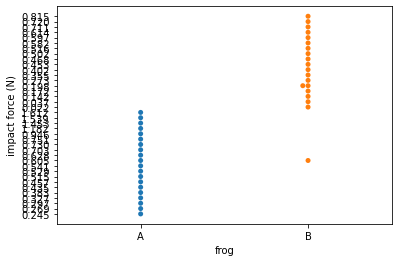

In [33]:
frogs = {'A': [1.612,0.605,0.327,0.946,0.541,1.539,0.529,0.628,1.453,0.297,0.703,0.269,0.751,0.245,1.182,0.515,0.435,0.383,0.457,0.730], 'B': [0.172,
0.142,
0.037,
0.453,
0.355,
0.022,
0.502,
0.273,
0.720,
0.582,
0.198,
0.198,
0.597,
0.516,
0.815,
0.402,
0.605,
0.711,
0.614,
0.468]}

df = pd.DataFrame(frogs, columns = ['A', 'B'])
#df_with_force = df.T

#Task create data frame for columnts: frog art and force!


frogs = pd.read_csv("frogs.csv", sep = ';', decimal= ",")

# Make bee swarm plot
_ = sns.swarmplot(x='frog', y='force', data=frogs)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Task: change ticker on the plot
# Show the plot
plt.show()


In [34]:
#ECDF function
def ecdf(data):
    # number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x=np.sort(data)
    # y-data for the ECDF: y
    y=np.arange(1, n+1)/n
    return x,y

#generating many bootsrap replicates
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

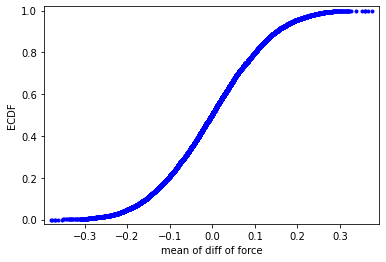

empirical_diff_means =  0.28825000000000006
p-value = 0.0039


In [35]:
force_a = frogs.loc[frogs['frog'] == 'A'].force.astype(float)
force_b = frogs.loc[frogs['frog'] == 'B'].force.astype(float)

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = np.mean(force_a)- np.mean(force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

x_2, y_2 = ecdf(perm_replicates)

_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')


# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('mean of diff of force')
_ = plt.ylabel('ECDF')
plt.show()

print('empirical_diff_means = ', empirical_diff_means)
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)


In [36]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / 10000

# Print the p-value
print('p = ', p)


p =  0.0057


In [37]:
# Compute mean of all forces: mean_force
forces_concat = np.concatenate((force_a, force_b), axis=None)
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p-value = 0.0051


In [38]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0002


In [41]:
# Create the range of dates here
seven_days = pd.date_range('2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.strftime("%A"))

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
